# Підготовка та аналіз даних 
## Лабораторна робота №7
### Сценарії обробки багатоспектральних супутникових зображень
### ФБ-21 Каюн Вероніка
<b>Мета роботи:</b> ознайомитися з основними принципами обробки даних дистанційного зондування Землі (ДЗЗ) та можливостями мови Python дляобробки геопросторової інформації, а саме, багатоспектральних супутникових зображень засобами бібліотеки абстракції супутникової інформації (GDAL).


Завантажила підготовлені супутникові дані з Google Classroom та розархівовую

In [12]:
import zipfile
import os

zip_file_path = 'lab 4 data.zip'
extract_to_dir = 'lab_4_data'
#Створення папки, якщо вона ще не існує
if not os.path.exists(extract_to_dir):
    os.makedirs(extract_to_dir)
# Розпакування
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_dir)
print("Файли успішно розпаковано.")


Файли успішно розпаковано.


Розпакування наборів архівів з продуктами ДЗЗ в новостворені папки, назви яких відповідатимуть ідентифікаторам зображень.

In [3]:
import os
import subprocess

data_dir = 'lab_4_data'
def gdal_command(command):
    try:
        subprocess.run(command, shell=True, check=True)
        print("Команда успішно виконана.")
    except subprocess.CalledProcessError as e:
        print("Сталася помилка під час виконання команди GDAL:", e)

for file in os.listdir(data_dir):
    if file.endswith(".zip"):
        zip_file_path = os.path.join(data_dir, file)
        extract_to_dir = os.path.join(data_dir, os.path.splitext(file)[0])
        if not os.path.exists(extract_to_dir):
            os.makedirs(extract_to_dir)
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_to_dir)
        print(f"Zip-файл {file} розпаковано.")


Zip-файл S2A_MSIL2A_20190821T085601_N0213_R007_T36UUA_20190821T115206.zip розпаковано.
Zip-файл S2A_MSIL2A_20190821T085601_N0213_R007_T36UUB_20190821T115206.zip розпаковано.


Конкатенація каналів видимого, ближнього та середнього
інфрачервоного спектральних діапазонів (канали 2, 3, 4 та 8) зображення в
єдиний GEOTIFF файл.

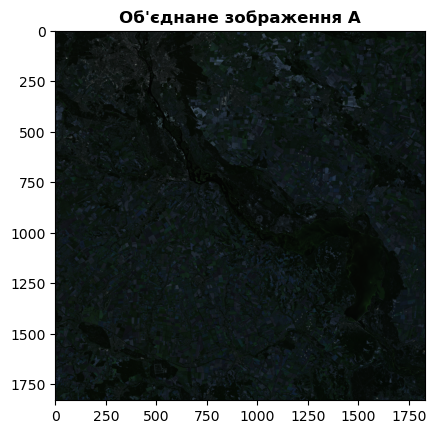

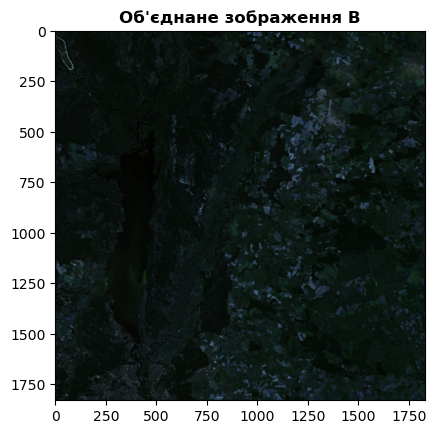

In [4]:
import os
import rasterio
from rasterio.plot import show

# Визначаємо шляхи до каналів для кожного набору даних
image_channels = {
    'A': {
        'B02': r'./lab_4_data/S2A_MSIL2A_20190821T085601_N0213_R007_T36UUA_20190821T115206/S2A_MSIL2A_20190821T085601_N0213_R007_T36UUA_20190821T115206.SAFE/GRANULE/L2A_T36UUA_A021740_20190821T085815/IMG_DATA/R60m/T36UUA_20190821T085601_B02_60m.jp2',
        'B03': r'./lab_4_data/S2A_MSIL2A_20190821T085601_N0213_R007_T36UUA_20190821T115206/S2A_MSIL2A_20190821T085601_N0213_R007_T36UUA_20190821T115206.SAFE/GRANULE/L2A_T36UUA_A021740_20190821T085815/IMG_DATA/R60m/T36UUA_20190821T085601_B03_60m.jp2',
        'B04': r'./lab_4_data/S2A_MSIL2A_20190821T085601_N0213_R007_T36UUA_20190821T115206/S2A_MSIL2A_20190821T085601_N0213_R007_T36UUA_20190821T115206.SAFE/GRANULE/L2A_T36UUA_A021740_20190821T085815/IMG_DATA/R60m/T36UUA_20190821T085601_B04_60m.jp2',
        'B8A': r'./lab_4_data/S2A_MSIL2A_20190821T085601_N0213_R007_T36UUA_20190821T115206/S2A_MSIL2A_20190821T085601_N0213_R007_T36UUA_20190821T115206.SAFE/GRANULE/L2A_T36UUA_A021740_20190821T085815/IMG_DATA/R60m/T36UUA_20190821T085601_B8A_60m.jp2'
    },
    'B': {
        'B02': r'./lab_4_data/S2A_MSIL2A_20190821T085601_N0213_R007_T36UUB_20190821T115206/S2A_MSIL2A_20190821T085601_N0213_R007_T36UUB_20190821T115206.SAFE/GRANULE/L2A_T36UUB_A021740_20190821T085815/IMG_DATA/R60m/T36UUB_20190821T085601_B02_60m.jp2',
        'B03': r'./lab_4_data/S2A_MSIL2A_20190821T085601_N0213_R007_T36UUB_20190821T115206/S2A_MSIL2A_20190821T085601_N0213_R007_T36UUB_20190821T115206.SAFE/GRANULE/L2A_T36UUB_A021740_20190821T085815/IMG_DATA/R60m/T36UUB_20190821T085601_B03_60m.jp2',
        'B04': r'./lab_4_data/S2A_MSIL2A_20190821T085601_N0213_R007_T36UUB_20190821T115206/S2A_MSIL2A_20190821T085601_N0213_R007_T36UUB_20190821T115206.SAFE/GRANULE/L2A_T36UUB_A021740_20190821T085815/IMG_DATA/R60m/T36UUB_20190821T085601_B04_60m.jp2',
        'B8A': r'./lab_4_data/S2A_MSIL2A_20190821T085601_N0213_R007_T36UUB_20190821T115206/S2A_MSIL2A_20190821T085601_N0213_R007_T36UUB_20190821T115206.SAFE/GRANULE/L2A_T36UUB_A021740_20190821T085815/IMG_DATA/R60m/T36UUB_20190821T085601_B8A_60m.jp2'
    }
}

# Визначаємо вихідні директорії для конкатенації
output_directories = ['concatenated_data/concat_A', 'concatenated_data/concat_B']
for directory in output_directories:
    os.makedirs(directory, exist_ok=True)

# Об'єднання файлів за допомогою gdal_merge.py
for dataset, paths in image_channels.items():
    output_file_path = f'concatenated_data/concat_{dataset}/conc_{dataset}.tif'
    merge_command = f'gdal_merge.py -o {output_file_path} -separate {" ".join(paths.values())}'
    os.system(merge_command)

concatenated_images = {
    dataset: rasterio.open(f'concatenated_data/concat_{dataset}/conc_{dataset}.tif')
    for dataset in ['A', 'B']
}

for dataset, raster in concatenated_images.items():
    show(raster.read([1, 2, 3]), adjust=True, title=f"Об'єднане зображення {dataset}")


Перепроектування супутникового зображення у проєкцію 4326.


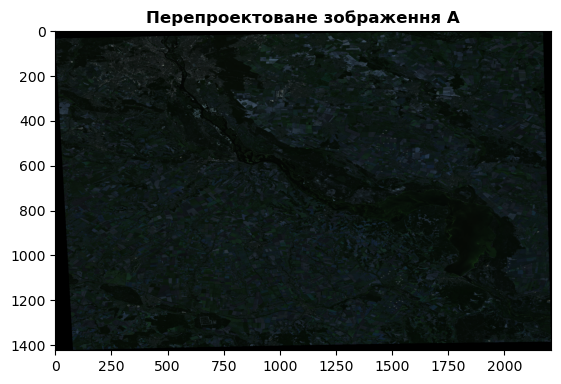

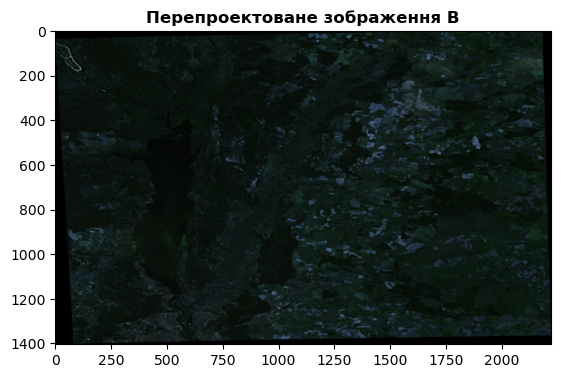

In [5]:
# Перепроектування зображень у проєкцію EPSG:4326 за допомогою gdalwarp
for dataset in concatenated_images.keys():
    input_file_path = f'concatenated_data/concat_{dataset}/conc_{dataset}.tif'
    output_file_path = f'concatenated_data/concat_{dataset}/conc_{dataset}_4326.tif'
    warp_command = f'gdalwarp -s_srs EPSG:32636 -t_srs EPSG:4326 {input_file_path} {output_file_path}'
    os.system(warp_command)


reprojected_images = {
    dataset: rasterio.open(f'concatenated_data/concat_{dataset}/conc_{dataset}_4326.tif')
    for dataset in ['A', 'B']
}

for dataset, raster in reprojected_images.items():
    show(raster.read([1, 2, 3]), adjust=True, title=f"Перепроектоване зображення {dataset}")

Конкатенація всіх отриманих растрів у один 4-канальний файл TIFF.

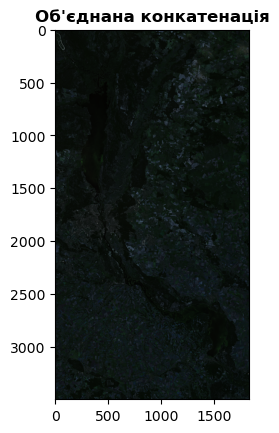

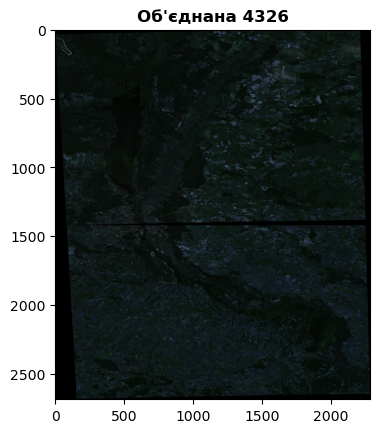

In [8]:
gdal_merge_cmd = 'gdal_merge.py -o concatenated_data/concat_A/full_concat.tif concatenated_data/concat_A/conc_A.tif concatenated_data/concat_B/conc_B.tif'
os.system(gdal_merge_cmd)

gdal_merge_cmd = 'gdal_merge.py -o concatenated_data/concat_B/full_4326.tif concatenated_data/concat_A/conc_A_4326.tif concatenated_data/concat_B/conc_B_4326.tif'
os.system(gdal_merge_cmd)

merged_all = {
    'конкатенація': rasterio.open('concatenated_data/concat_A/full_concat.tif'),
    '4326': rasterio.open('concatenated_data/concat_B/full_4326.tif')
}

for name, raster in merged_all.items():
    show(raster.read([1, 2, 3]), adjust=True, title=f"Об'єднана {name}")

Обрізання результуючого зображення по заданому векторному контуру.

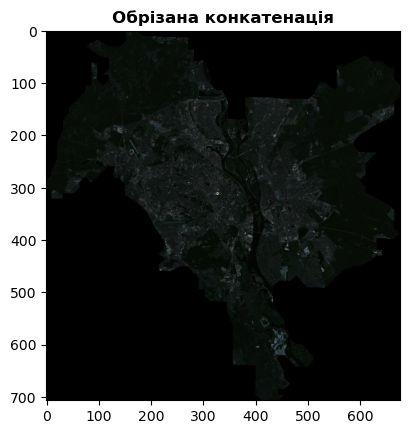

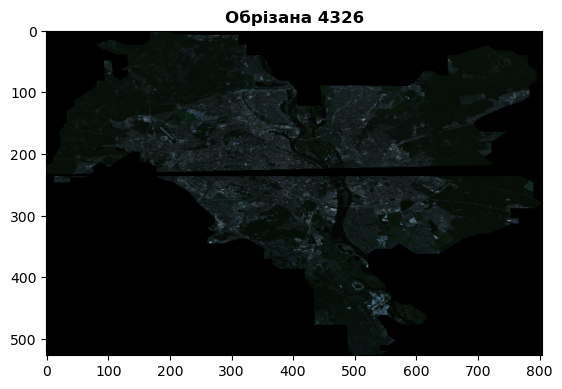

In [10]:
gdalwarp_cmd = 'gdalwarp -cutline lab_4_data/Kyiv_regions.shp -crop_to_cutline concatenated_data/concat_A/full_concat.tif concatenated_data/cut_concat.tif'
os.system(gdalwarp_cmd)

gdalwarp_cmd = 'gdalwarp -cutline lab_4_data/Kyiv_regions.shp -crop_to_cutline concatenated_data/concat_B/full_4326.tif concatenated_data/cut_4326.tif'
os.system(gdalwarp_cmd)

cut_all = {
    'конкатенація': rasterio.open('concatenated_data/cut_concat.tif'),
    '4326': rasterio.open('concatenated_data/cut_4326.tif')
}

for name, raster in cut_all.items():
    show(raster.read([1, 2, 3]), adjust=True, title=f'Обрізана {name}')